In [1]:
from scipy import stats
import scipy.stats as ss
import pandas as pd
import numpy as np
import statsmodels.stats.weightstats as ws
from statsmodels.stats.power import tt_ind_solve_power
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dat = pd.read_csv('datasets_causal.csv')

print(dat.columns)

dat.head()

Index(['Unnamed: 0', 'group', 'prod'], dtype='object')


,Unnamed: 0,group,prod
0,261,control,3.44
1,168,intervention,3.26
2,498,control,4.26
3,447,control,4.53
4,64,intervention,5.92


In [4]:
dat.group.unique()

array(['control', 'intervention'], dtype=object)

In [5]:
dat.describe()

,Unnamed: 0,prod
count,500.000000,500.000000
mean,250.500000,4.160080
std,144.481833,1.006379
min,1.000000,0.700000
25%,125.750000,3.522500
50%,250.500000,4.120000
75%,375.250000,4.817500
max,500.000000,7.850000


In [7]:
dat[['group', 'prod']].groupby('group').mean()

,prod
group,
control,4.01912
intervention,4.30104


In [8]:
dat[['group', 'prod']].groupby('group').describe()

prod                                                     
              count     mean       std  min     25%    50%     75%   max
group                                                                   
control       250.0  4.01912  0.985053  0.7  3.4000  4.025  4.6150  6.51
intervention  250.0  4.30104  1.009671  1.7  3.6825  4.270  5.0575  7.85

In [9]:
# we are figuring out the t-statistic and p-value, confidence intervals and degrees of fredom for each group

In [23]:
def t_test_two_samp(df, alpha, alternative='two-sided'):
    
    a = df[df.group == 'control']['prod']
    b = df[df.group == 'intervention']['prod']
    
    diff = a.mean() -b.mean()
    
    res = ss.ttest_ind(a,b)
    
    means = ws.CompareMeans(ws.DescrStatsW(a), ws.DescrStatsW(b))
    confint = means.tconfint_diff (alpha = alpha, alternative=alternative, usevar='unequal')
    degfree = means.dof_satt()
    
    index = ['DegFreedom','Difference','Statistic','PValue','Low95CI', 'High95CI']
    return pd.Series([degfree, diff, res[0], res[1], confint[0], confint[1]], index = index)

test = t_test_two_samp(dat, .05)
test

DegFreedom    497.696852
Difference     -0.281920
Statistic      -3.160058
PValue          0.001673
Low95CI        -0.457202
High95CI       -0.106638
dtype: float64

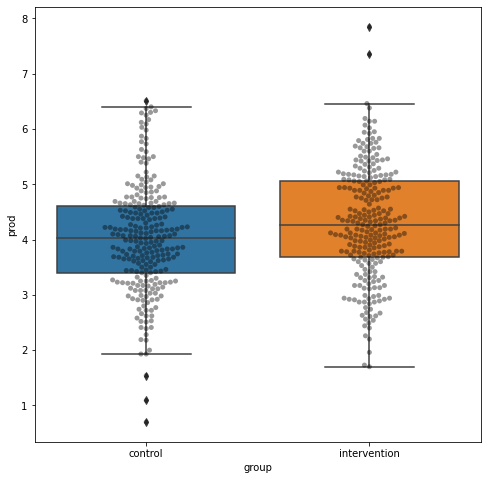

In [29]:
ax = plt.figure(figsize=(8,8)).gca()
sns.boxplot(x='group', y = 'prod', data = dat, ax = ax)
sns.swarmplot(x='group', y= 'prod', color = 'black', data = dat, ax = ax, alpha=.4)

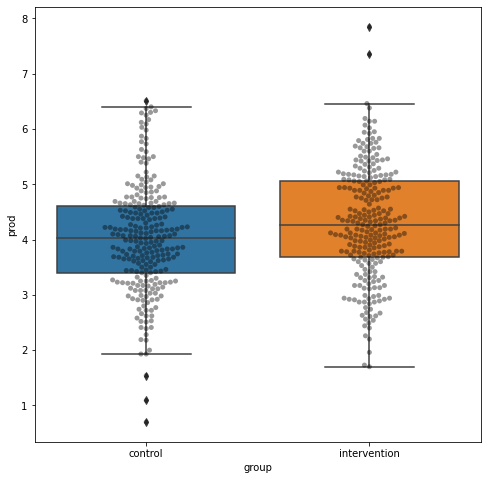

In [31]:
ax = plt.figure(figsize=(8,8)).gca()
sns.boxplot(x='group', y = 'prod', data = dat, ax =ax)
sns.swarmplot(x='group', y= 'prod', color = 'black', data = dat, alpha=.4)

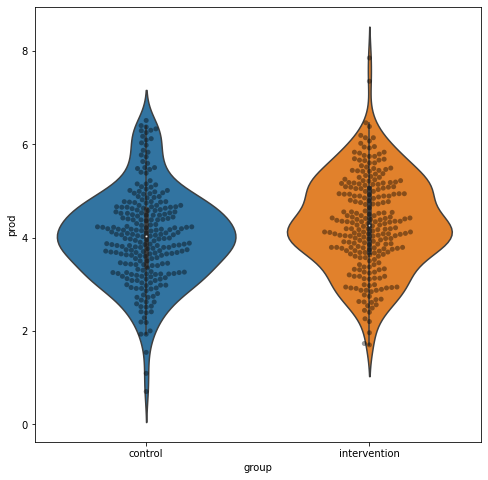

In [32]:
ax = plt.figure(figsize=(8,8)).gca() # define axis
sns.violinplot(x = 'group', y = 'prod', data = dat, ax = ax)
sns.swarmplot(x = 'group', y = 'prod', color = 'black', data = dat, ax = ax, alpha = 0.4)

In [35]:
control = dat[dat.group == 'control']['prod']
intervention = dat[dat.group =='intervention']['prod']
print(np.mean(intervention)- np.mean(control))
ratio = len(control)/len(intervention)
ratio

0.2819200000000013


1.0

In [39]:
tt_ind_solve_power(effect_size=None, nobs1=len(control),power=.8, alpha=0.05, alternative='two-sided')

0.2510656132114522